In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 130)

In [2]:
# team rankings from S&P+ or something like that
# number of croots per ranking from 247 talent composite page
df = pd.read_csv("recruitingRankings.csv", header=None, names=["Team", "5_Raw", "4_Raw", "3_Raw"])
df

,Team,5_Raw,4_Raw,3_Raw
0,Alabama,11,58,13
1,Georgia,13,47,25
2,LSU,14,45,25
3,Oklahoma,6,41,31
4,Ohio State,7,44,32
5,Florida,5,36,40
6,Auburn,3,43,37
7,Texas A&M,5,45,31
8,Texas,7,33,33
9,Clemson,4,46,25


## Compute chances for each round

In [3]:
def ComputeChances(r):
    pf = PolynomialFeatures(2)

### 5*

In [4]:
df["5_Exp"] = 0.0
nn = MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000, solver="lbfgs", random_state=0)
nn.fit(df.index.to_numpy().reshape((-1, 1)), df["5_Raw"])

for i in range(130):
    df.at[i, "5_Exp"] = max(nn.predict([[i]]), 0)

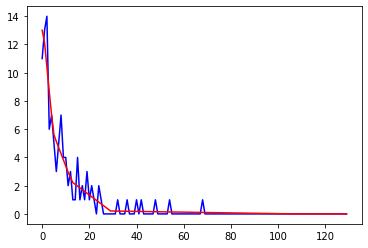

In [5]:
plt.plot(df.index, df["5_Raw"], "b")
plt.plot(df.index, df["5_Exp"], "r")

### 4*

In [6]:
df["4_Exp"] = 0.0
nn = MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000, solver="lbfgs", random_state=42)
nn.fit(df.index.to_numpy().reshape((-1, 1)), df["4_Raw"])

for i in range(130):
    df.at[i, "4_Exp"] = max(nn.predict([[i]]), 0)

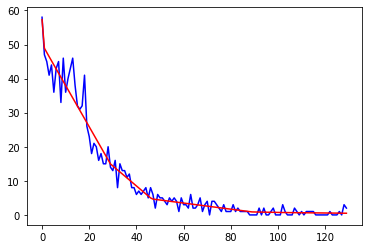

In [7]:
plt.plot(df.index, df["4_Raw"], "b")
plt.plot(df.index, df["4_Exp"], "r")

### 3*

In [8]:
df["3_Exp"] = 0.0
nn = MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=500, solver="lbfgs", random_state=0)
nn.fit(df.index.to_numpy().reshape((-1, 1)), df["3_Raw"])

for i in range(130):
    df.at[i, "3_Exp"] = max(nn.predict([[i]]), 0)

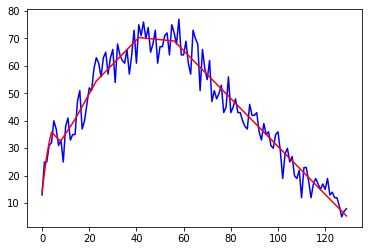

In [9]:
plt.plot(df.index, df["3_Raw"], "b")
plt.plot(df.index, df["3_Exp"], "r")

## Scaling

In [10]:
df.sum()

Team     AlabamaGeorgiaLSUOklahomaOhio StateFloridaAubu...
5_Raw                                                  111
4_Raw                                                 1292
3_Raw                                                 5786
5_Exp                                              111.956
4_Exp                                               1292.1
3_Exp                                              5785.88
dtype: object

In [11]:
for r in (5, 4, 3):
    df[str(r) + "_Prob"] = df[str(r) + "_Exp"] / df.sum()[str(r) + "_Exp"]

## Final Output

In [12]:
df.head(130)

,Team,5_Raw,4_Raw,3_Raw,5_Exp,4_Exp,3_Exp,5_Prob,4_Prob,3_Prob
0,Alabama,11,58,13,13.006555,57.299817,14.138378,0.116176,0.044346,0.002444
1,Georgia,13,47,25,12.143640,48.912875,20.901967,0.108468,0.037855,0.003613
2,LSU,14,45,25,10.386767,47.650624,27.321595,0.092775,0.036879,0.004722
3,Oklahoma,6,41,31,8.670747,46.439520,32.031843,0.077448,0.035941,0.005536
4,Ohio State,7,44,32,6.979414,45.228630,35.907093,0.062341,0.035004,0.006206
5,Florida,5,36,40,5.603918,44.017741,35.058688,0.050055,0.034067,0.006059
6,Auburn,3,43,37,5.133869,42.806852,34.104933,0.045856,0.033130,0.005895
7,Texas A&M,5,45,31,4.698004,41.595963,33.143199,0.041963,0.032193,0.005728
8,Texas,7,33,33,4.262140,40.385074,32.741599,0.038070,0.031255,0.005659
9,Clemson,4,46,25,3.826276,39.174185,34.021700,0.034177,0.030318,0.005880


In [13]:
df.to_csv("recruitingProbabilities.csv", index=False)